Universidad Complutense de Madrid x NTIC
Machine Learning

Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Importamos Google Drive para poder acceder a los documentos.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
archivos = '/content/drive/My Drive/'

Ingresamos los datasets subidos al Google Drive y los guardamos en variables.

In [4]:
df_train_values = pd.read_csv(archivos + 'training_set_values.csv', index_col='id')
df_train_labels = pd.read_csv(archivos + 'training_set_labels.csv', index_col='id')
df_test_values = pd.read_csv(archivos + 'test_set_values.csv', index_col='id')
df_sumission_format = pd.read_csv(archivos + 'submissionformat.csv', index_col='id')

Usamos los comandos .info() y .sum() para explorar los datos que tenemos en los CSV. Ver las variables que contiene, sus columnas y valores. También, y lo mas importante, analizar los datos faltantes.

In [5]:
df_train_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55763 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59398 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  war

En el archivo 'train_values' las variables "funder", "installer",  "wpt_name", "subvillage", "public_meeting", "scheme_management", "scheme_name" y "permit" son los variables que no estan completas, en otras palabras que tienen valores 'null' (en blanco).

In [6]:
df_test_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14850 entries, 50785 to 68707
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             14850 non-null  float64
 1   date_recorded          14850 non-null  object 
 2   funder                 13980 non-null  object 
 3   gps_height             14850 non-null  int64  
 4   installer              13973 non-null  object 
 5   longitude              14850 non-null  float64
 6   latitude               14850 non-null  float64
 7   wpt_name               14850 non-null  object 
 8   num_private            14850 non-null  int64  
 9   basin                  14850 non-null  object 
 10  subvillage             14751 non-null  object 
 11  region                 14850 non-null  object 
 12  region_code            14850 non-null  int64  
 13  district_code          14850 non-null  int64  
 14  lga                    14850 non-null  object 
 15  war

En el archivo 'test_values' las variables "funder", "installer", "subvillage", "public_meeting", "scheme_management", "scheme_name" y "permit" son los variables que no estan completas, en otras palabras que tienen valores 'null' (en blanco).

In [7]:
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59400 entries, 69572 to 26348
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status_group  59400 non-null  object
dtypes: object(1)
memory usage: 928.1+ KB


El archivo 'train_labels' si esta completo.

In [8]:
df_sumission_format.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14850 entries, 50785 to 68707
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status_group  14850 non-null  object
dtypes: object(1)
memory usage: 232.0+ KB


Ahora que ya hemos analizado las variables que estan vacias, vamos a contar cuantas variables faltantes tienen cada una de ellas.

In [9]:
df_train_values.isnull().sum()

amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
dtype: int64

In [10]:
df_test_values.isnull().sum()

amount_tsh                  0
date_recorded               0
funder                    870
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7242
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source                      0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint_type_group       0
dtype: int64

Ahora que sabemos la cantidad de null's que tienen las variables, los vamos a sustituir por 'unknown'. Esto nos ayudará a la hora de predecir. Al final vamos a comprobar si ha quedado algun dato faltante.

In [11]:
cols_to_impute_categorical = [
    'funder', 'installer', 'wpt_name', 'subvillage', 'public_meeting',
    'scheme_management', 'scheme_name', 'permit'
]

In [12]:
df_train_values[cols_to_impute_categorical] = df_train_values[cols_to_impute_categorical].fillna('Unknown')
df_test_values[cols_to_impute_categorical] = df_test_values[cols_to_impute_categorical].fillna('Unknown')


In [13]:
print(df_train_values[cols_to_impute_categorical].isnull().sum())

funder               0
installer            0
wpt_name             0
subvillage           0
public_meeting       0
scheme_management    0
scheme_name          0
permit               0
dtype: int64


In [14]:
print(df_test_values[cols_to_impute_categorical].isnull().sum())

funder               0
installer            0
wpt_name             0
subvillage           0
public_meeting       0
scheme_management    0
scheme_name          0
permit               0
dtype: int64


Podemos ver que ahora en ambos archivos no tiene más datos faltantes.

Si nos fijamos en la variable 'date_recorded' no esta en tipo fecha.Tenemos que pasar los datos de type object a datetime en ambos archivos.

In [15]:
df_train_values['date_recorded'] = pd.to_datetime(df_train_values['date_recorded'])
df_test_values['date_recorded'] = pd.to_datetime(df_test_values['date_recorded'])

In [16]:
df_train_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   amount_tsh             59400 non-null  float64       
 1   date_recorded          59400 non-null  datetime64[ns]
 2   funder                 59400 non-null  object        
 3   gps_height             59400 non-null  int64         
 4   installer              59400 non-null  object        
 5   longitude              59400 non-null  float64       
 6   latitude               59400 non-null  float64       
 7   wpt_name               59400 non-null  object        
 8   num_private            59400 non-null  int64         
 9   basin                  59400 non-null  object        
 10  subvillage             59400 non-null  object        
 11  region                 59400 non-null  object        
 12  region_code            59400 non-null  int64         
 13  di

In [17]:
df_test_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14850 entries, 50785 to 68707
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   amount_tsh             14850 non-null  float64       
 1   date_recorded          14850 non-null  datetime64[ns]
 2   funder                 14850 non-null  object        
 3   gps_height             14850 non-null  int64         
 4   installer              14850 non-null  object        
 5   longitude              14850 non-null  float64       
 6   latitude               14850 non-null  float64       
 7   wpt_name               14850 non-null  object        
 8   num_private            14850 non-null  int64         
 9   basin                  14850 non-null  object        
 10  subvillage             14850 non-null  object        
 11  region                 14850 non-null  object        
 12  region_code            14850 non-null  int64         
 13  di

Ahora queremos extraer el año, mes y día de la variable "date_recorded".

In [18]:
df_train_values['year_recorded'] = df_train_values['date_recorded'].dt.year
df_train_values['month_recorded'] = df_train_values['date_recorded'].dt.month
df_train_values['day_recorded'] = df_train_values['date_recorded'].dt.day

df_test_values['year_recorded'] = df_test_values['date_recorded'].dt.year
df_test_values['month_recorded'] = df_test_values['date_recorded'].dt.month
df_test_values['day_recorded'] = df_test_values['date_recorded'].dt.day

In [19]:
(df_train_values[['date_recorded', 'year_recorded', 'month_recorded', 'day_recorded']].head())

date_recorded  year_recorded  month_recorded  day_recorded
id                                                              
69572    2011-03-14           2011               3            14
8776     2013-03-06           2013               3             6
34310    2013-02-25           2013               2            25
67743    2013-01-28           2013               1            28
19728    2011-07-13           2011               7            13

In [20]:
(df_test_values[['date_recorded', 'year_recorded', 'month_recorded', 'day_recorded']].head())

date_recorded  year_recorded  month_recorded  day_recorded
id                                                              
50785    2013-02-04           2013               2             4
51630    2013-02-04           2013               2             4
17168    2013-02-01           2013               2             1
45559    2013-01-22           2013               1            22
49871    2013-03-27           2013               3            27

Al obtener las fechas y horas podemos saber la edad (antiguedad) de los pozos.

Calculamos la antiguedad del pozo gracias a la columna 'contruction_year', calculamos la mediana y reemplazamos los 0 con la media calculada. Ya con eso calculamos la antiguedad de los pozos.

In [21]:
train_valid_construction_years = df_train_values['construction_year'][df_train_values['construction_year'] > 0]
median_constr_year_train = train_valid_construction_years.median()
median_constr_year_train



2000.0

In [22]:
df_train_values['construction_year'] = df_train_values['construction_year'].replace(0, median_constr_year_train)
df_test_values['construction_year'] = df_test_values['construction_year'].replace(0, median_constr_year_train)

In [23]:
df_train_values['age_in_years'] = df_train_values['year_recorded'] - df_train_values['construction_year']
df_test_values['age_in_years'] = df_test_values['year_recorded'] - df_test_values['construction_year']


In [24]:
print('Train')
print(df_train_values[['construction_year', 'year_recorded', 'age_in_years']].head())

print(' ')
print('Test')
print(df_test_values[['construction_year', 'year_recorded', 'age_in_years']].head())



Train
       construction_year  year_recorded  age_in_years
id                                                   
69572               1999           2011            12
8776                2010           2013             3
34310               2009           2013             4
67743               1986           2013            27
19728               2000           2011            11
 
Test
       construction_year  year_recorded  age_in_years
id                                                   
50785               2012           2013             1
51630               2000           2013            13
17168               2010           2013             3
45559               1987           2013            26
49871               2000           2013            13


Ahora que hemos creado las nuevas variables de fecha y hora. Ahora, vamos eliminar la columna de 'date_recorded' y 'year_recorded' porque ya no lo usaremos.

In [25]:
df_train_values = df_train_values.drop(['date_recorded', 'year_recorded'], axis=1)
df_test_values = df_test_values.drop(['date_recorded', 'year_recorded'], axis=1)

print('train')
df_train_values.info()

train
<class 'pandas.core.frame.DataFrame'>
Index: 59400 entries, 69572 to 26348
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   funder                 59400 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   installer              59400 non-null  object 
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   wpt_name               59400 non-null  object 
 7   num_private            59400 non-null  int64  
 8   basin                  59400 non-null  object 
 9   subvillage             59400 non-null  object 
 10  region                 59400 non-null  object 
 11  region_code            59400 non-null  int64  
 12  district_code          59400 non-null  int64  
 13  lga                    59400 non-null  object 
 14  ward                   59400 non-null  object 
 1

Convertimos 29 columnas de tipo object a numerico. Esto lo realizamos porque los modelos de Machine Learning solo entienden numeros.


In [26]:
objects = df_train_values.select_dtypes(include='object').columns

for col in objects:
  print(f"{col}: {df_train_values[col].nunique()}")

funder: 1896
installer: 2145
wpt_name: 37399
basin: 9
subvillage: 19288
region: 21
lga: 125
ward: 2092
public_meeting: 3
recorded_by: 1
scheme_management: 12
scheme_name: 2696
permit: 3
extraction_type: 18
extraction_type_group: 13
extraction_type_class: 7
management: 12
management_group: 5
payment: 7
payment_type: 7
water_quality: 8
quality_group: 6
quantity: 5
quantity_group: 5
source: 10
source_type: 7
source_class: 3
waterpoint_type: 7
waterpoint_type_group: 6


Eliminamos columnas que tienen muchos valores y no ayudan para el trabajo, siendo "recorded_by", "wpt_name" y "subvillage".

Comprobamos que esas variables ya no existan.

In [27]:
cols_to_drop = ['recorded_by', 'wpt_name', 'subvillage']

In [28]:
df_train_values = df_train_values.drop(cols_to_drop, axis=1)
df_test_values = df_test_values.drop(cols_to_drop, axis=1)

In [29]:
print(f"Columnas eliminadas: {cols_to_drop}")
print("Dimensiones de df_train_values después de eliminar columnas:", df_train_values.shape)
print("Dimensiones de df_test_values después de eliminar columnas:", df_test_values.shape)

Columnas eliminadas: ['recorded_by', 'wpt_name', 'subvillage']
Dimensiones de df_train_values después de eliminar columnas: (59400, 38)
Dimensiones de df_test_values después de eliminar columnas: (14850, 38)


Identificamos el resto de columnas tipo object. Concatenamos los DataFrames de entrenamiento y prueba. Aplicamos el metodo "One-Hot Encoding.

Al final, separamos los dataframes.

In [30]:
obj_cols = df_train_values.select_dtypes(include='object').columns.tolist()

print(f"Columnas categóricas finales a codificar ({len(obj_cols)}): {obj_cols}")


Columnas categóricas finales a codificar (26): ['funder', 'installer', 'basin', 'region', 'lga', 'ward', 'public_meeting', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [31]:
n_train = df_train_values.shape[0]
all_data_values = pd.concat([df_train_values, df_test_values], axis=0)


all_data_values.shape

(74250, 38)

In [32]:
all_data_values_encoded = pd.get_dummies(all_data_values, columns=obj_cols, dummy_na=False)

all_data_values_encoded.shape

(74250, 9826)

Despues de unir y codificar los datos de entrenamientos y de prueba, los volvemos a dividir.

In [33]:
df_train_processed = all_data_values_encoded[:n_train].copy()
df_test_processed = all_data_values_encoded[n_train:].copy()

In [34]:
df_train_processed.shape
df_test_processed.shape

(14850, 9826)

Aqui veremos cuales son las primeras 5 filas de ambos datasets. Lo realizamos para comprobar que todo este bien.

In [35]:
df_train_processed.head()
df_test_processed.head()

amount_tsh  gps_height  longitude   latitude  num_private  region_code  \
id                                                                              
50785         0.0        1996  35.290799  -4.059696            0           21   
51630         0.0        1569  36.656709  -3.309214            0            2   
17168         0.0        1567  34.767863  -5.004344            0           13   
45559         0.0         267  38.058046  -9.418672            0           80   
49871       500.0        1260  35.006123 -10.950412            0           10   

       district_code  population  construction_year  month_recorded  ...  \
id                                                                   ...   
50785              3         321               2012               2  ...   
51630              2         300               2000               2  ...   
17168              2         500               2010               2  ...   
45559             43         250               1987               1  ...   
49871              3          60               2000               3  ...   

       waterpoint_type_dam  waterpoint_type_hand pump  \
id                                                      
50785                False                      False   
51630                False                      False   
17168                False                      False   
45559                False                      False   
49871                False                      False   

       waterpoint_type_improved spring  waterpoint_type_other  \
id                                                              
50785                            False                   True   
51630                            False                  False   
17168                            False                   True   
45559                            False                   True   
49871                            False                  False   

       waterpoint_type_group_cattle trough  \
id                                           
50785                                False   
51630                                False   
17168                                False   
45559                                False   
49871                                False   

       waterpoint_type_group_communal standpipe  waterpoint_type_group_dam  \
id                                                                           
50785                                     False                      False   
51630                                      True                      False   
17168                                     False                      False   
45559                                     False                      False   
49871                                      True                      False   

       waterpoint_type_group_hand pump  waterpoint_type_group_improved spring  \
id                                                                              
50785                            False                                  False   
51630                            False                                  False   
17168                            False                                  False   
45559                            False                                  False   
49871                            False                                  False   

       waterpoint_type_group_other  
id                                  
50785                         True  
51630                        False  
17168                         True  
45559                         True  
49871                        False  

[5 rows x 9826 columns]

Hemos terminado con el punto de **PREPROCESAMIENTO** continuamos con al parte de **MODELADO**.


Vamos a usar la variable 'status_group' para predecir el modelo.
Vamos a convertir las etiquetas de texto a número y guardarlas en una variable ('train_labels_encoded')

In [36]:
train_labels = df_train_labels['status_group']

In [37]:
train_labels_encoded = train_labels.astype('category').cat.codes

Vamos a ver las primeras cinco filas de ambos datasets.

In [38]:
print(train_labels.head())
print(train_labels_encoded.head())

id
69572        functional
8776         functional
34310        functional
67743    non functional
19728        functional
Name: status_group, dtype: object
id
69572    0
8776     0
34310    0
67743    2
19728    0
dtype: int8


Ahora, vamos a crera un diccionario de numeros (0,1,2) respondiendo al texto 'functional', 'non functional', etc).

In [39]:
label_mapping = dict(enumerate(train_labels.astype('category').cat.categories))

print(label_mapping)

{0: 'functional', 1: 'functional needs repair', 2: 'non functional'}


Ahora vamos a dividir los datos para entrenamiento y validación.

In [40]:
X = df_train_processed
y = train_labels_encoded

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [42]:
print("Datos de entrenamiento divididos en conjuntos de entrenamiento y validación.")
print(f"Dimensiones de X_train (entrenamiento - características): {X_train.shape}")
print(f"Dimensiones de X_val (validación - características): {X_val.shape}")
print(f"Dimensiones de y_train (entrenamiento - etiquetas): {y_train.shape}")
print(f"Dimensiones de y_val (validación - etiquetas): {y_val.shape}")

Datos de entrenamiento divididos en conjuntos de entrenamiento y validación.
Dimensiones de X_train (entrenamiento - características): (47520, 9826)
Dimensiones de X_val (validación - características): (11880, 9826)
Dimensiones de y_train (entrenamiento - etiquetas): (47520,)
Dimensiones de y_val (validación - etiquetas): (11880,)


Ahora vamos a contar cuantas veces (clase 0,1 y 2) las etiquetas de entrenamiento muestran las proporciones.

In [43]:
y_train.value_counts(normalize=True)

0    0.543077
2    0.384238
1    0.072685
Name: proportion, dtype: float64

In [44]:
y_val.value_counts(normalize=True)

0    0.543098
2    0.384259
1    0.072643
Name: proportion, dtype: float64

Ahora vamos a entrenar el modelo.

In [45]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("Modelo Random Forest instanciado.")

Modelo Random Forest instanciado.


Para terminar vamos a finalizar comprobando el rendimiento del modelo obtenido.

Vamos a comenzar entrenando el modelo con los datos de entrenamiento.

In [46]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

Con el modelo entrenado, vamos a predecir datos de validación.

In [47]:
y_pred = rf_model.predict(X_val)

Ahora vamos a calcular la precisión de la predicción realizada.

In [48]:
accuracy = accuracy_score(y_val, y_pred)

In [49]:
print(f"\nPrecisión (Accuracy) del modelo en el conjunto de validación: {accuracy:.4f}")



Precisión (Accuracy) del modelo en el conjunto de validación: 0.8060


Podemos ver que la validación ha dado 0.8060. Esto signfica que el modelo ha podido predecir el 80.60% de los pozos de agua.










Ahora que ya hemos terminado, guardaremos los datos en un archivo llamado "Submission.csv".

In [50]:
y_test_pred_encoded = rf_model.predict(df_test_processed)

In [51]:
label_mapping = dict(enumerate(df_train_labels['status_group'].astype('category').cat.categories))


In [52]:
y_test_pred_labels = pd.Series(y_test_pred_encoded).map(label_mapping)

In [53]:
submission_df = pd.DataFrame({
    'id': df_test_processed.index,
    'status_group': y_test_pred_labels
})
print(submission_df.head())

      id    status_group
0  50785  non functional
1  51630      functional
2  17168      functional
3  45559  non functional
4  49871      functional


In [54]:
submission_df.to_csv('submission.csv', index=False)


Realizaremos graficas para poder visualizar los datos y entenderlos de una mejor manera.

Vamos a comenzar con un mapa de la localizacion de los grifos, distinguidos por colores.

In [56]:
import plotly.express as px

In [62]:
if 'df_train_plot' not in locals():
    df_train_plot = df_train_values.copy()
    df_train_plot['status_group'] = df_train_labels['status_group']


fig = px.scatter_mapbox(df_train_plot,
                        lat="latitude",
                        lon="longitude",
                        color="Estado del Grifo",
                        title="Localizacion de grigos de Agua por Estado Operativo en Tanzania",
                        hover_name=df_train_plot.index,
                        hover_data={'latitude':False, 'longitude':False},
                        zoom=5,
                        center={"lat": -6, "lon": 35},
                        height=600,
                        mapbox_style="open-street-map")


fig.show()

Podemos ver que los grifos de agua no estan distribuidos de forma uniforme por Tanzania, sino estan distribuidas operativamente. Probablemente sea por ciudades y pueblos, siendo las areas donde más grifos las ciudades más grandes.

Continuamos con otro grafico, ahora de una grafica de distribucion de antiguedad.

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

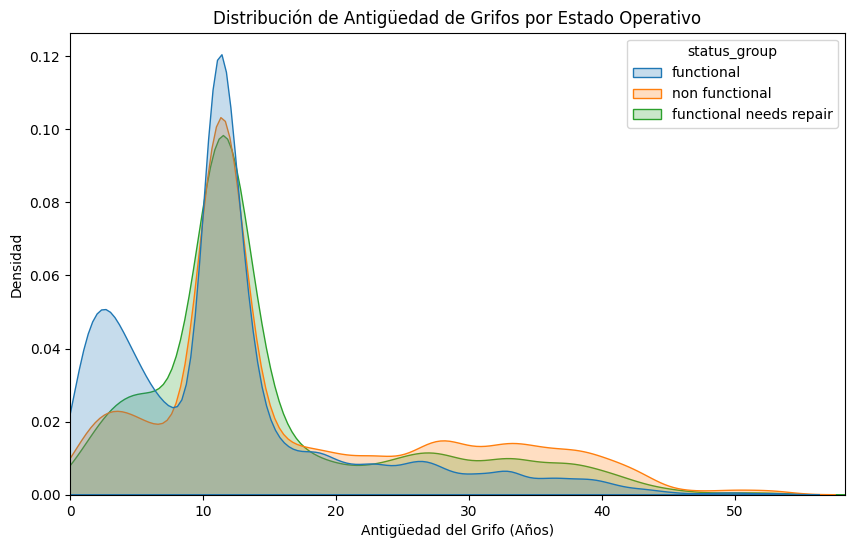

In [65]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df_train_plot, x='age_in_years', hue='status_group', fill=True, common_norm=False)

plt.title('Distribución de Antigüedad de Grifos por Estado Operativo')
plt.xlabel('Antigüedad del Grifo (Años)')
plt.ylabel('Densidad')
plt.xlim(0, df_train_plot['age_in_years'].max() * 1.1)

plt.show()

La grafica muestra perfectamente que entre mas pasan los años, menos funcionan los grifos. Tambien la curva en los tres grupos muestra la poca duracion de los grifos, donde despues de los 20 años no tienen mucha durabilidad y la mayoria no funciona.





Ahora, por ultimo realizaremos una grafica de proporción del estado operativo de cada región de Tanzanía.

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [69]:
if 'df_train_plot' not in locals():
   df_train_plot = df_train_values.copy(),
   df_train_plot['status_group'] = df_train_labels['status_group']

In [70]:
region_status_proportion = df_train_plot.groupby('region')['status_group'].value_counts(normalize=True).unstack()
if 'non functional' in region_status_proportion.columns:
    region_status_proportion = region_status_proportion.sort_values(by='non functional', ascending=False)
elif 'non functional ' in region_status_proportion.columns:
     region_status_proportion = region_status_proportion.sort_values(by='non functional ', ascending=False)

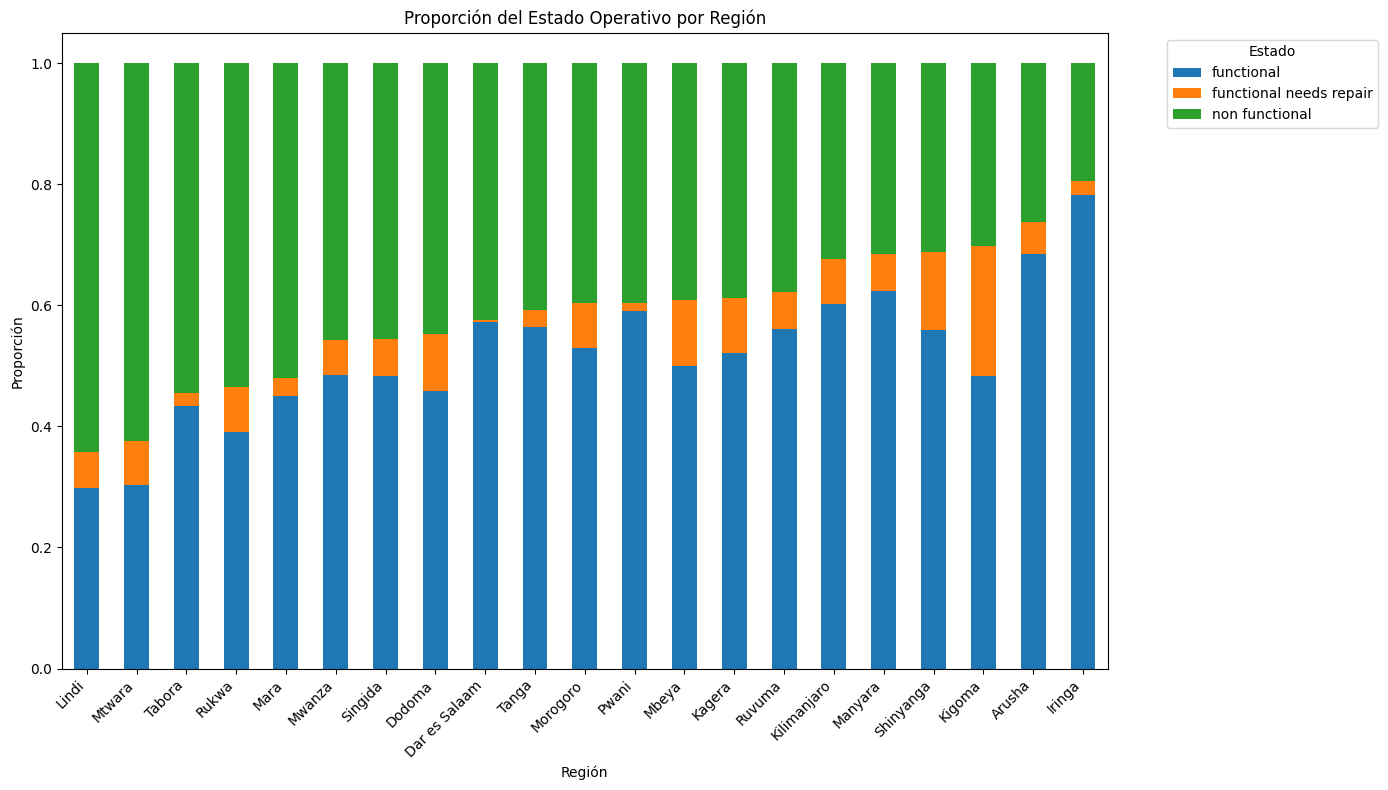

In [75]:
plt.figure(figsize=(14, 8))
region_status_proportion.plot(kind='bar', stacked=True, figsize=(14, 8), ax=plt.gca())

plt.title('Proporción del Estado Operativo por Región')
plt.xlabel('Región')
plt.ylabel('Proporción')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Esta ultima grafica muestra la proporcion de grifos que funciona, no funcionan y necesitan ser reparadas. Se puede ver que la region donde los grifos no funcionan (con mayoria) es en Lindi, mientras que en Kinga la mayoria funciona. Donde mas reparaciones se necesitan es en Kigoma.